# Investigation of house sale price and neighborhood venues

## 1. Introdction

New York City (NYC) is known as one of the most expensive city in the world in terms of real estate prices. Not only New Yorkers are trying to buy their dream houses, NYC also attracts investors all over the world to their real estate market. There are many factors that are related to the sold house price, such as building age, number of units in the building, etc. This project will be focused on other relating factors from the neighborhood venue categories found on FourSquare. More specifically, we will investigate what kinds of venues in a NYC neighborhood have correlation with the neighborhood property price. 

## 2. Data

In this project, we use the kaggle dataset of NYC Property Sales: https://www.kaggle.com/new-york-city/nyc-property-sales. This dataset contains properties sold in New York City over a 12-month period from September 2016 to September 2017, together with their borough and neighborhood information, among others. We will study the correlation between the neighborhood property price and the neighborhood venue categories. 

After downloading the kaggle dataset of NYC Property Sales at https://www.kaggle.com/new-york-city/nyc-property-sales/download: 

In [214]:
import pandas as pd # library for data analsysis
data = pd.read_csv("nyc-rolling-sales.csv")
# Renaming BOROUGHS
data['BOROUGH'][data['BOROUGH'] == 1] = 'Manhattan'
data['BOROUGH'][data['BOROUGH'] == 2] = 'Bronx'
data['BOROUGH'][data['BOROUGH'] == 3] = 'Brooklyn'
data['BOROUGH'][data['BOROUGH'] == 4] = 'Queens'
data['BOROUGH'][data['BOROUGH'] == 5] = 'Staten Island'

# Change the settings so that one can see all columns of the dataframe when calling df.head()
pd.set_option('display.max_columns',999)
data.head()

/Users/yuan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null object
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GR

There are 84548 entries with 22 data columns. In this project, we will mainly need the 3 columns "SALE PRICE", "BOROUGH", and "Neighborhood" for our study. 

In [216]:
#SALE PRICE is object but should be numeric
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null object
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GR

In [217]:
print("{} house sale transactions with a total amount of {} in NYC".format(len(data),  data['SALE PRICE'].sum()))
print("{} house sale transactions with a total amount of {} in Manhattan".format(len(data[data['BOROUGH']=='Manhattan']),  data[data['BOROUGH']=='Manhattan']['SALE PRICE'].sum()))


84548 house sale transactions with a total amount of 89335360909.0 in NYC
18306 house sale transactions with a total amount of 48196678399.0 in Manhattan


In [218]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00


Then we can see that the "SALE PRICE" is numeric with some "NaN" values. 

Next, we check whether there are no duplicated rows. 

In [219]:
# Unnamed: 0 is an artifact from the data load and can be deleted
del data['Unnamed: 0']
sum(data.duplicated(data.columns))


765

There are 765 duplicates. Let's remove the

In [220]:
#Delete the duplicates and check that it worked
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

We check the missing values in the 3 columns that we need. 

In [221]:
print(sum(data['NEIGHBORHOOD'].isnull()))
print(sum(data['BOROUGH'].isnull()))
print(sum(data['SALE PRICE'].isnull()))

0
0
14176


Let's drop all the rows where the price is missing. 

In [222]:
data.dropna(subset=['SALE PRICE'],inplace=True)
data.shape

(69607, 21)

Let's focus on the 3 following columns: 

In [223]:
data=data[['BOROUGH','NEIGHBORHOOD','SALE PRICE']]
data.describe(include='all')

,BOROUGH,NEIGHBORHOOD,SALE PRICE
count,69607,69607,6.960700e+04
unique,5,254,NaN
top,Brooklyn,FLUSHING-NORTH,NaN
freq,23843,2199,NaN
mean,NaN,NaN,1.280703e+06
std,NaN,NaN,1.143036e+07
min,NaN,NaN,0.000000e+00
25%,NaN,NaN,2.300000e+05
50%,NaN,NaN,5.330000e+05
75%,NaN,NaN,9.500000e+05


Data visualization: The distribution of price by boxplot. 

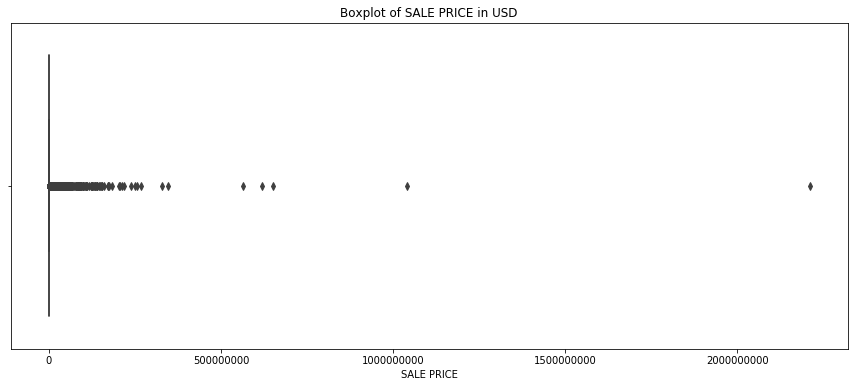

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

We include only the property sales between the following prices. 

In [225]:
# Remove observations that fall outside those caps
data = data[(data['SALE PRICE'] > 50000) & (data['SALE PRICE'] < 20000000)]
len(data)

57314

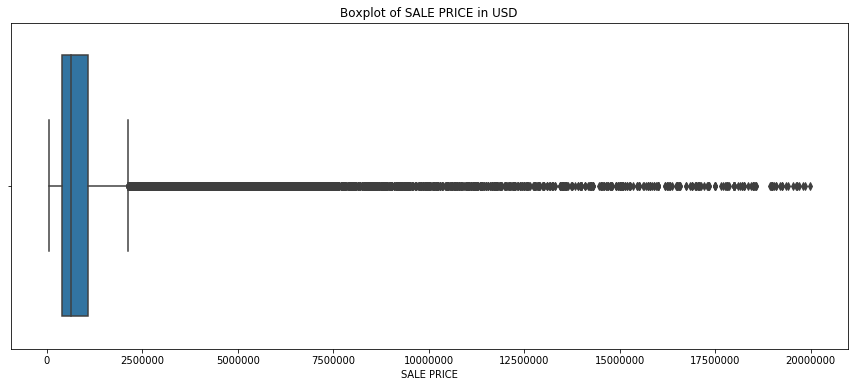

In [226]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

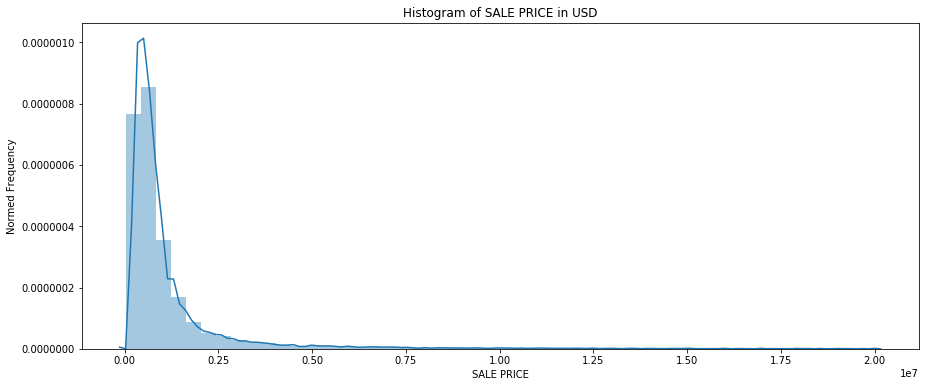

In [227]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(data['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

We look at the price distribution of the 5 boroughs: 

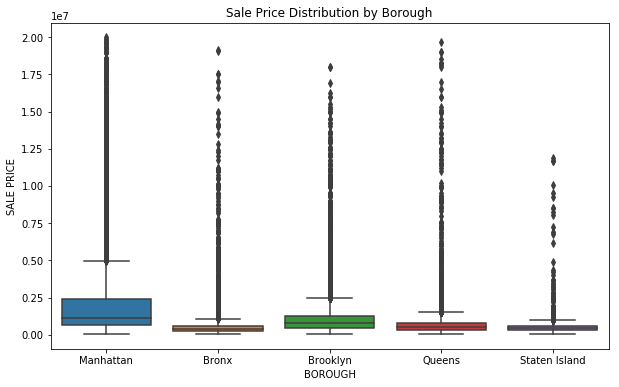

In [228]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=data)
plt.title('Sale Price Distribution by Borough')
plt.show()

We will focus our study on the most expensive borough: Manhattan. 

In [229]:
manhattan=data[data['BOROUGH']=='Manhattan']
len(manhattan)

13886

Drop the "BOROUGH" column and re-index. 

In [230]:
manhattan=manhattan.drop('BOROUGH',axis=1).reset_index(drop=True)
manhattan.head()

,NEIGHBORHOOD,SALE PRICE
0,ALPHABET CITY,6625000.0
1,ALPHABET CITY,3936272.0
2,ALPHABET CITY,8000000.0
3,ALPHABET CITY,3192840.0
4,ALPHABET CITY,16232000.0


In [231]:
manhattan.groupby('NEIGHBORHOOD').median()

,SALE PRICE
NEIGHBORHOOD,
ALPHABET CITY,1014940.0
CHELSEA,1382500.0
CHINATOWN,1751425.0
CIVIC CENTER,5083613.0
CLINTON,1140000.0
EAST VILLAGE,1050000.0
FASHION,1692500.0
FINANCIAL,1461188.0
FLATIRON,2435000.0


In [232]:
manhattan.groupby('NEIGHBORHOOD').count()

,SALE PRICE
NEIGHBORHOOD,
ALPHABET CITY,142
CHELSEA,638
CHINATOWN,59
CIVIC CENTER,272
CLINTON,287
EAST VILLAGE,127
FASHION,68
FINANCIAL,413
FLATIRON,379


In [233]:
manhattan.groupby('NEIGHBORHOOD').mean()

,SALE PRICE
NEIGHBORHOOD,
ALPHABET CITY,1.771554e+06
CHELSEA,2.565195e+06
CHINATOWN,2.716454e+06
CIVIC CENTER,5.685360e+06
CLINTON,1.544265e+06
EAST VILLAGE,2.174165e+06
FASHION,2.790604e+06
FINANCIAL,2.032177e+06
FLATIRON,3.596913e+06


In [234]:
len(manhattan['NEIGHBORHOOD'].unique())

39

In [ ]:
Handle neighborhood names so that geocoder can find them.

In [236]:
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace(' \(59-79\)','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace(' \(79-96\)','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace(' \(96-110\)','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace(' \(96-116\)','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace('-CENTRAL','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace('-WEST','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace('-EAST','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace('-UPPER','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace(' UPPER','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace(' LOWER','')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace('JAVITS CENTER','JAVITS')
manhattan['NEIGHBORHOOD']=manhattan['NEIGHBORHOOD'].str.replace('MIDTOWN CBD','MIDTOWN')

print(manhattan['NEIGHBORHOOD'].unique())
print(len(manhattan['NEIGHBORHOOD'].unique()))

['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE' 'HARLEM' 'INWOOD' 'JAVITS' 'KIPS BAY' 'LITTLE ITALY'
 'LOWER EAST SIDE' 'MANHATTAN VALLEY' 'MIDTOWN' 'MIDTOWN EAST'
 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS' 'MURRAY HILL' 'ROOSEVELT ISLAND'
 'SOHO' 'SOUTHBRIDGE' 'TRIBECA' 'UPPER EAST SIDE' 'UPPER WEST SIDE'
 'WASHINGTON HEIGHTS']
30


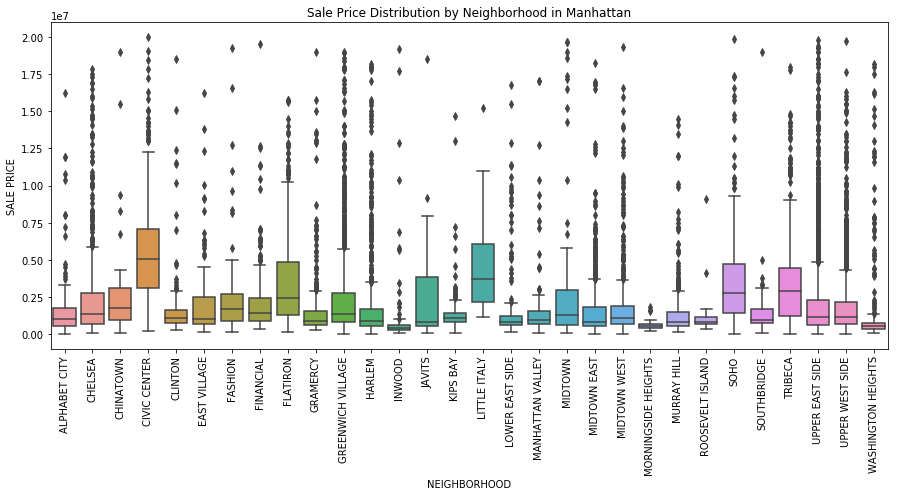

In [372]:
plt.figure(figsize=(15,6))
sns.boxplot(x='NEIGHBORHOOD', y='SALE PRICE', data=manhattan)
plt.title('Sale Price Distribution by Neighborhood in Manhattan')
plt.xticks(rotation=90)
plt.show()

In [237]:
manhattan.groupby('NEIGHBORHOOD').median()

,SALE PRICE
NEIGHBORHOOD,
ALPHABET CITY,1014940.0
CHELSEA,1382500.0
CHINATOWN,1751425.0
CIVIC CENTER,5083613.0
CLINTON,1140000.0
EAST VILLAGE,1050000.0
FASHION,1692500.0
FINANCIAL,1461188.0
FLATIRON,2435000.0


In [243]:
df_manhattan=manhattan.groupby('NEIGHBORHOOD').median()

In [239]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location=None
while(location is None):
    location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [276]:
geolocator = Nominatim(user_agent="ny_explorer")
def getLatLon(address):
    location = None
    while(location is None): 
        location = geolocator.geocode(address, timeout=10)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
    return latitude, longitude

In [277]:
latlon=pd.DataFrame(columns=['latitude','longitude'])
for nbh in df_manhattan.index:
    #print(nbh)
    lat, lon = getLatLon(nbh+', Manhattan, New York City, NY')
    #print("{} {}".format(lat, lon))
    latlon = latlon.append({'latitude':lat,'longitude':lon}, ignore_index=True)
    #print(latlon)
    
latlon

The geograpical coordinate of ALPHABET CITY, Manhattan, New York City, NY are 40.7251022, -73.9795833.
The geograpical coordinate of CHELSEA, Manhattan, New York City, NY are 40.7464906, -74.0015283.
The geograpical coordinate of CHINATOWN, Manhattan, New York City, NY are 40.7164913, -73.9962504.
The geograpical coordinate of CIVIC CENTER, Manhattan, New York City, NY are 40.7136793, -74.0024042.
The geograpical coordinate of CLINTON, Manhattan, New York City, NY are 40.7644228, -73.9923918.
The geograpical coordinate of EAST VILLAGE, Manhattan, New York City, NY are 40.7292688, -73.9873613.
The geograpical coordinate of FASHION, Manhattan, New York City, NY are 40.7472611, -73.9945507.
The geograpical coordinate of FINANCIAL, Manhattan, New York City, NY are 40.7076124, -74.009378.
The geograpical coordinate of FLATIRON, Manhattan, New York City, NY are 40.7410861, -73.9896298242.
The geograpical coordinate of GRAMERCY, Manhattan, New York City, NY are 40.7355189, -73.9840794.
The ge

,latitude,longitude
0,40.725102,-73.979583
1,40.746491,-74.001528
2,40.716491,-73.996250
3,40.713679,-74.002404
4,40.764423,-73.992392
5,40.729269,-73.987361
6,40.747261,-73.994551
7,40.707612,-74.009378
8,40.741086,-73.989630
9,40.735519,-73.984079


In [273]:
geolocator.geocode('ROOSEVELT ISLAND, Manhattan, New York City, NY')

Location((40.7614177, -73.9502281671, 0.0))

In [278]:
latlon.set_index(df_manhattan.index,inplace=True)
df_manhattan = pd.concat([df_manhattan,latlon],axis=1)
df_manhattan

,SALE PRICE,latitude,longitude
NEIGHBORHOOD,,,
ALPHABET CITY,1014940.0,40.725102,-73.979583
CHELSEA,1382500.0,40.746491,-74.001528
CHINATOWN,1751425.0,40.716491,-73.996250
CIVIC CENTER,5083613.0,40.713679,-74.002404
CLINTON,1140000.0,40.764423,-73.992392
EAST VILLAGE,1050000.0,40.729269,-73.987361
FASHION,1692500.0,40.747261,-73.994551
FINANCIAL,1461188.0,40.707612,-74.009378
FLATIRON,2435000.0,40.741086,-73.989630


Display neighborhood name with median price on a map.

In [371]:
import folium # map rendering library
lat, lon = getLatLon('Manhattan, New York City, NY')
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[lat, lon], zoom_start=11)

# add markers to map
for lat, lng, name, price in zip(df_manhattan['latitude'], df_manhattan['longitude'], df_manhattan.index, df_manhattan['SALE PRICE']):
    label = folium.Popup(name+' '+str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

The geograpical coordinate of Manhattan, New York City, NY are 40.7896239, -73.9598939.


We will query the Foursquare database to explore venues around each neighborhood. 

In [289]:
CLIENT_ID = 'H5RFO4MOC4MYR04ISCOUVW2ZHLFVACPFMNPJNYN0AWJVK30H' # your Foursquare ID
CLIENT_SECRET = 'Z0L3TILA0LOF0NZKCB2JEJIVMDPHT5AEOAVH2JKKQEJWF4AD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

import requests # library to handle requests

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Your credentails:
CLIENT_ID: H5RFO4MOC4MYR04ISCOUVW2ZHLFVACPFMNPJNYN0AWJVK30H
CLIENT_SECRET:Z0L3TILA0LOF0NZKCB2JEJIVMDPHT5AEOAVH2JKKQEJWF4AD


In [290]:
manhattan_venues = getNearbyVenues(names=df_manhattan.index,
                                   latitudes=df_manhattan['latitude'],
                                   longitudes=df_manhattan['longitude']
                                  )


ALPHABET CITY
CHELSEA
CHINATOWN
CIVIC CENTER
CLINTON
EAST VILLAGE
FASHION
FINANCIAL
FLATIRON
GRAMERCY
GREENWICH VILLAGE
HARLEM
INWOOD
JAVITS
KIPS BAY
LITTLE ITALY
LOWER EAST SIDE
MANHATTAN VALLEY
MIDTOWN
MIDTOWN EAST
MIDTOWN WEST
MORNINGSIDE HEIGHTS
MURRAY HILL
ROOSEVELT ISLAND
SOHO
SOUTHBRIDGE
TRIBECA
UPPER EAST SIDE
UPPER WEST SIDE
WASHINGTON HEIGHTS


In [291]:
print(manhattan_venues.shape)
manhattan_venues.head()

(2670, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALPHABET CITY,40.725102,-73.979583,Alphabet City Beer Co.,40.723753,-73.979043,Beer Bar
1,ALPHABET CITY,40.725102,-73.979583,Sunny & Annie Gourmet Deli,40.724590,-73.981600,Deli / Bodega
2,ALPHABET CITY,40.725102,-73.979583,Bobwhite Counter,40.723715,-73.979121,Fried Chicken Joint
3,ALPHABET CITY,40.725102,-73.979583,Sake Bar Satsko,40.724647,-73.980190,Sake Bar
4,ALPHABET CITY,40.725102,-73.979583,The Wayland,40.725264,-73.978040,Cocktail Bar


In [292]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALPHABET CITY,100,100,100,100,100,100
CHELSEA,100,100,100,100,100,100
CHINATOWN,100,100,100,100,100,100
CIVIC CENTER,100,100,100,100,100,100
CLINTON,100,100,100,100,100,100
EAST VILLAGE,100,100,100,100,100,100
FASHION,100,100,100,100,100,100
FINANCIAL,100,100,100,100,100,100
FLATIRON,100,100,100,100,100,100


In [293]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 297 uniques categories.


In [294]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Ski Shop,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Synagogue,Szechuan Restaurant,TV Station,Taco Place,Tailor Shop,Taiwanese Rest

In [296]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Ski Shop,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Synagogue,Szechuan Restaurant,TV Station,Taco Place,Tailor Shop,Taiwanese Rest

In [297]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALPHABET CITY----
          venue  freq
0  Cocktail Bar  0.09
1           Bar  0.06
2   Coffee Shop  0.04
3        Garden  0.04
4      Wine Bar  0.03


----CHELSEA----
                venue  freq
0         Art Gallery  0.28
1             Theater  0.03
2         Pizza Place  0.03
3                Café  0.03
4  Italian Restaurant  0.03


----CHINATOWN----
                   venue  freq
0     Chinese Restaurant  0.12
1                 Bakery  0.09
2  Vietnamese Restaurant  0.05
3     Salon / Barbershop  0.04
4     Italian Restaurant  0.04


----CIVIC CENTER----
                venue  freq
0  Chinese Restaurant  0.11
1         Coffee Shop  0.06
2        Dessert Shop  0.04
3  Dim Sum Restaurant  0.04
4                Park  0.03


----CLINTON----
                venue  freq
0  Mexican Restaurant  0.06
1             Theater  0.05
2     Thai Restaurant  0.05
3  Italian Restaurant  0.05
4            Wine Bar  0.04


----EAST VILLAGE----
                 venue  freq
0  Japanese Restaurant  0

In [313]:
manhattan_grouped.set_index('Neighborhood',inplace=True)
manhattan_grouped.head()

,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Ski Shop,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Synagogue,Szechuan Restaurant,TV Station,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas 

In [314]:
from scipy import stats
high_corr=pd.DataFrame(columns=['venue_category','pearson_coef','p_value'])
for feature in manhattan_grouped.columns:
    pearson_coef, p_value = stats.pearsonr(manhattan_grouped[feature], df_manhattan['SALE PRICE'])
    print("{:22s}: \t Correlation Coefficient {:.2f} \t P-value {}".format(feature.encode('utf-8'), pearson_coef, p_value))
    if p_value < 0.05 and sum(manhattan_venues['Venue Category']==feature)>5:
        high_corr = high_corr.append({'venue_category':feature,'pearson_coef':pearson_coef,'p_value':p_value}, ignore_index=True)


Accessories Store     : 	 Correlation Coefficient 0.34 	 P-value 0.0683237558578
African Restaurant    : 	 Correlation Coefficient -0.09 	 P-value 0.652152418291
American Restaurant   : 	 Correlation Coefficient -0.04 	 P-value 0.815648716366
Amphitheater          : 	 Correlation Coefficient -0.11 	 P-value 0.580774568961
Animal Shelter        : 	 Correlation Coefficient 0.06 	 P-value 0.762905742585
Antique Shop          : 	 Correlation Coefficient 0.28 	 P-value 0.134435445484
Arcade                : 	 Correlation Coefficient 0.27 	 P-value 0.15509252032
Arepa Restaurant      : 	 Correlation Coefficient -0.07 	 P-value 0.70314760642
Argentinian Restaurant: 	 Correlation Coefficient -0.06 	 P-value 0.733871695068
Art Gallery           : 	 Correlation Coefficient -0.00 	 P-value 0.988164142132
Art Museum            : 	 Correlation Coefficient -0.10 	 P-value 0.611152943616
Arts & Crafts Store   : 	 Correlation Coefficient 0.41 	 P-value 0.0235209345235
Asian Restaurant      : 	 Correla

In [329]:
high_corr.reindex(high_corr.pearson_coef.abs().sort_values(ascending = False).index)


,venue_category,pearson_coef,p_value
5,Dim Sum Restaurant,0.603476,0.000415
10,Optical Shop,0.568231,0.001054
12,Salon / Barbershop,0.511324,0.003879
9,Martial Arts Dojo,0.453967,0.011740
7,Falafel Restaurant,0.446707,0.013336
3,Deli / Bodega,-0.435020,0.016284
8,Furniture / Home Store,0.420752,0.020598
0,Arts & Crafts Store,0.412430,0.023521
2,Dance Studio,0.410312,0.024317
4,Dessert Shop,0.407086,0.025571


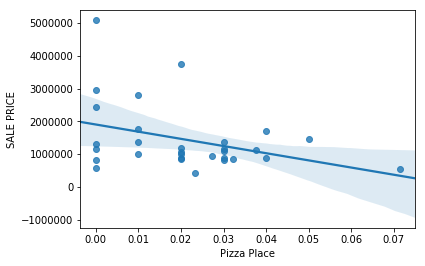

In [338]:
sns.regplot(x=manhattan_grouped['Pizza Place'], y=df_manhattan['SALE PRICE'])

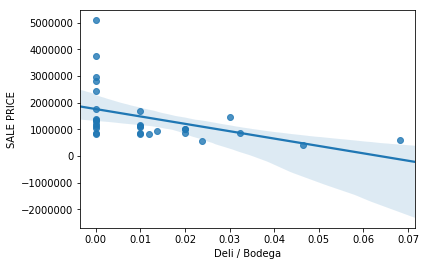

In [358]:
sns.regplot(x=manhattan_grouped['Deli / Bodega'], y=df_manhattan['SALE PRICE'])

Arts & Crafts Store


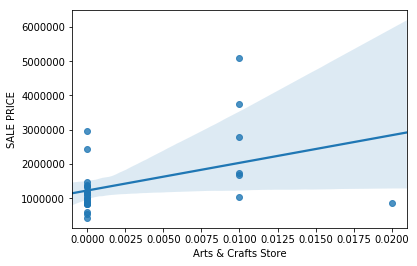

Chinese Restaurant


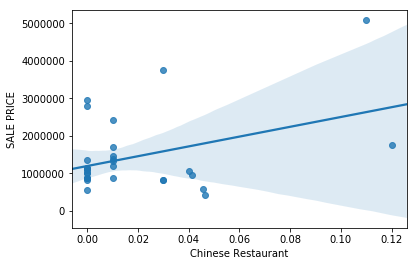

Dance Studio


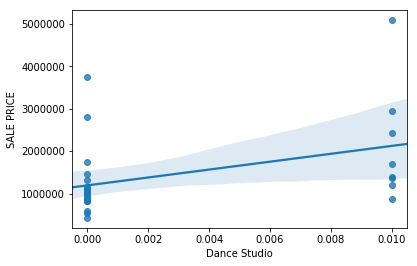

Deli / Bodega


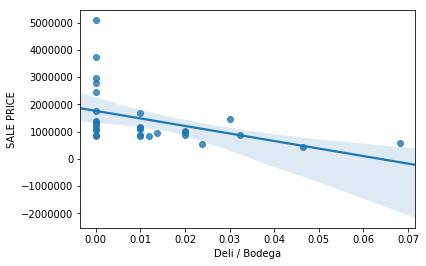

Dessert Shop


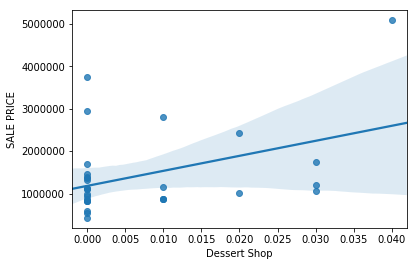

Dim Sum Restaurant


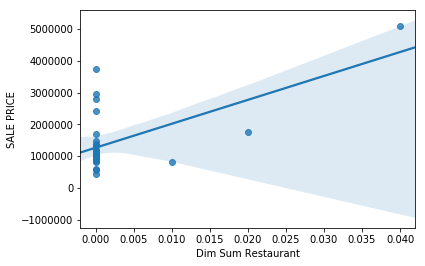

Dog Run


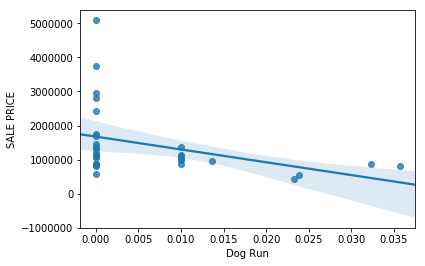

Falafel Restaurant


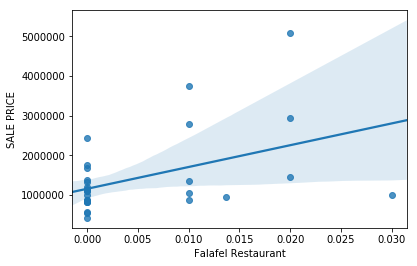

Furniture / Home Store


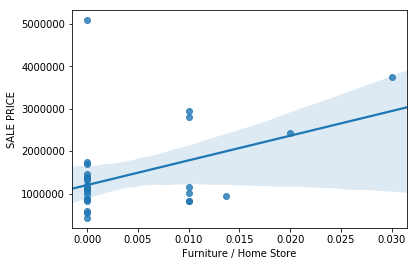

Martial Arts Dojo


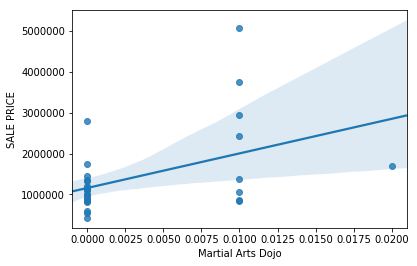

Optical Shop


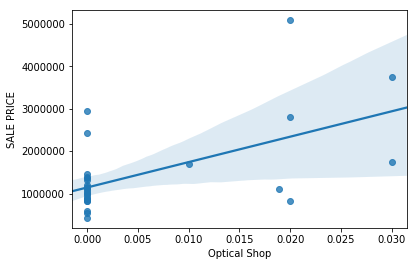

Pizza Place


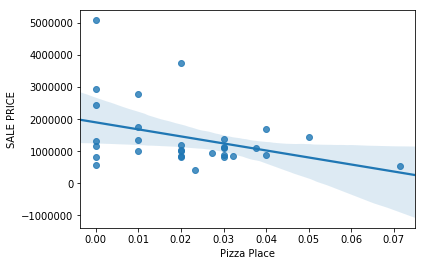

Salon / Barbershop


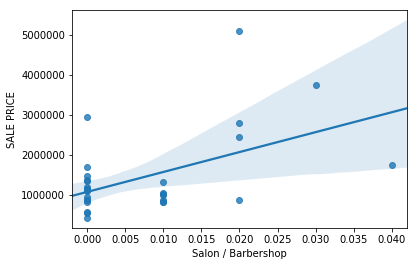

Women's Store


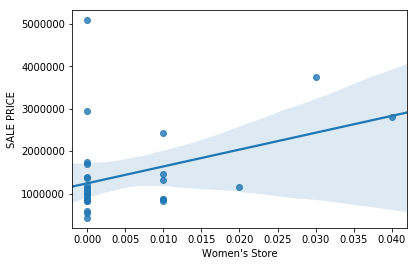

In [364]:
for feature in high_corr.venue_category:
    print(feature)
    sns.regplot(x=manhattan_grouped[feature], y=df_manhattan['SALE PRICE'])
    plt.show()
#sns.regplot(x=manhattan_grouped['Salon / Barbershop'], y=df_manhattan['SALE PRICE'])